<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/A_Kar_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1. Data Summary** 

 This data science project aims to extract meaningful information from studying the various attributes of different diamonds by using various graphics, comparisons, and statistical analysis tools available through python libraries like pandas, matplotlib.pyplot, and seaborn.
The dataset was taken from the [ggplot2](https://ggplot2.tidyverse.org/reference/diamonds.html) repository.


---




There are **ten** **attributes** in a **Diamond**:


> 

1.   Carat
2.   Cut
3. Color
4. Clarity
5. Depth
6. Table
7. Price
8. x - length in mm
9. y - width in mm
10. depth in mm




Short explanation of some of the  attributes:

**Carat**: It is the weight of the diamond. One carat is equal to 0.20 grams. Only 1 in 1,000 diamonds weighs more than a carat.

**Cut**: It is the quality of the diamond correlated with expert craftsmanship.

**Clarity**: A measurement of how clear and spotless the diamond is. 

**Color**: Ranging from D to J. D - Best, J - Worst

[reference](https://www.gia.edu/diamond/buyers-guide)


---



In [15]:
#import required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read diamonds.csv file directly from github and disregard the first column that contains indices
df = pd.read_csv("https://raw.githubusercontent.com/zenilist/DataAnalytics/main/diamonds.csv", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
#print each column of the dataset
list(df.columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [17]:
#print the datatypes of all the attributes
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [18]:
#print the total number of diamonds in the dataset: 53840
df.shape[0]

53940

In [19]:
#check if any data is null(blank). source code: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
df.isnull().values.any()

False

#***Part 2: Exploratory Data Analysis***

Here we would look at all the attributes using the powerful pandas, matplotlib and seaborn libraries through various graphs. We would comment on some *interesting facts* along the way.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72487b2310>,
      dtype=object)

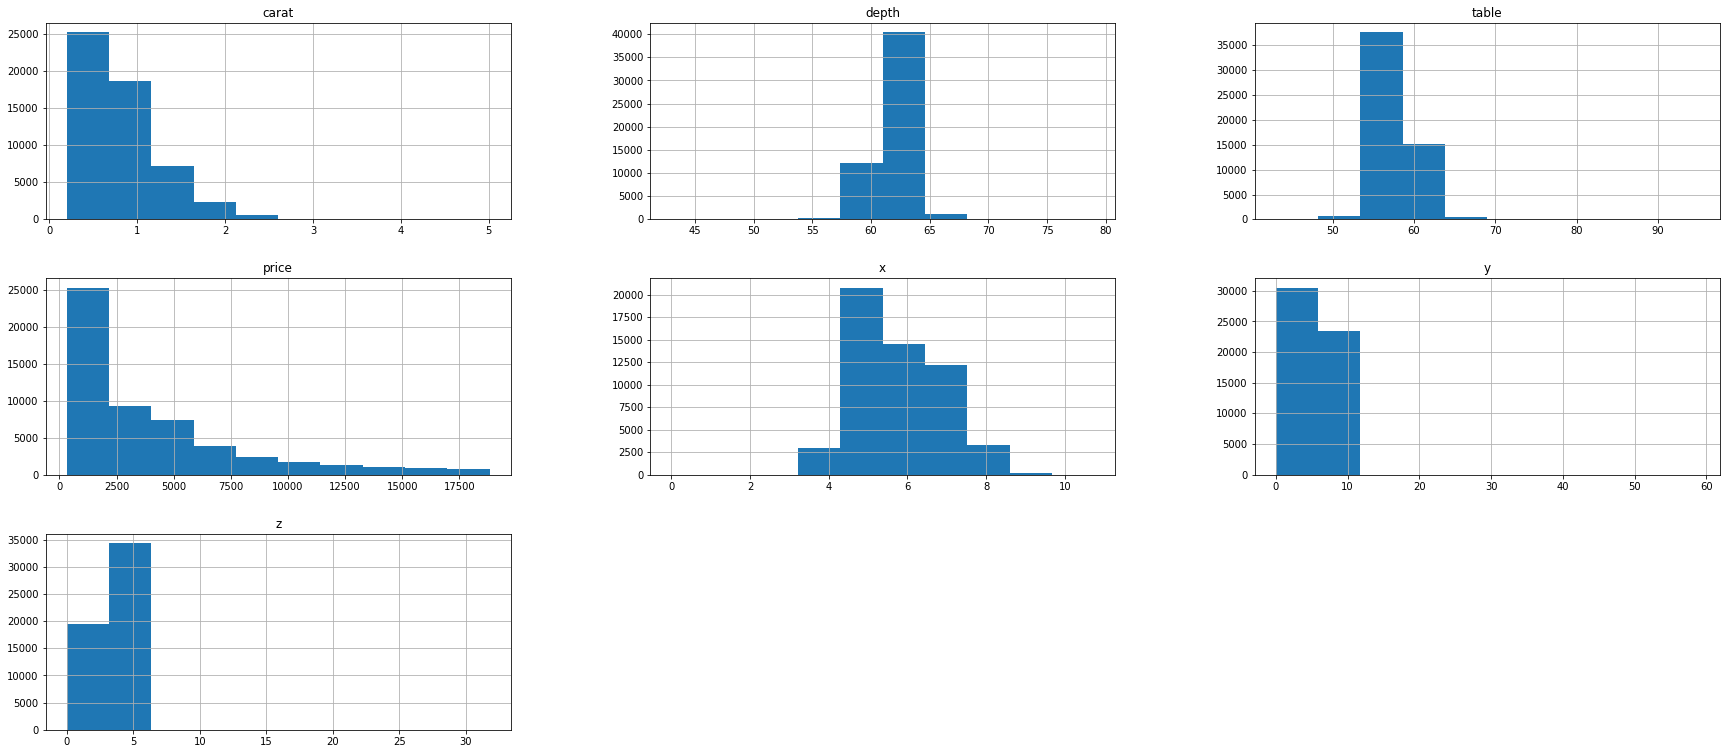

In [20]:
#histogram to represent all the numeric attributes of the diamond dataset
df.hist(figsize=(30,13))

In [21]:
#display mean, standard deviation and other statistical models for all the numeric attributes
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


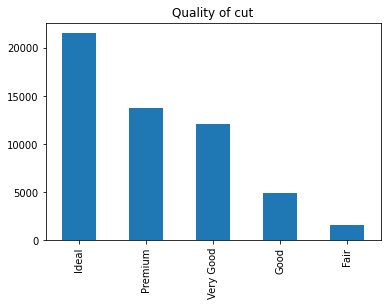

In [22]:
#Frequency of different types of cut, code inspired from EDA_Notes 
df['cut'].value_counts().plot.bar(title= "Quality of cut")


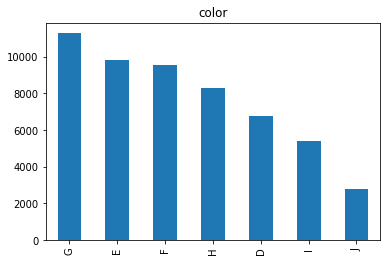

In [23]:
#display bar plot for color
df['color'].value_counts().plot.bar(title='color')

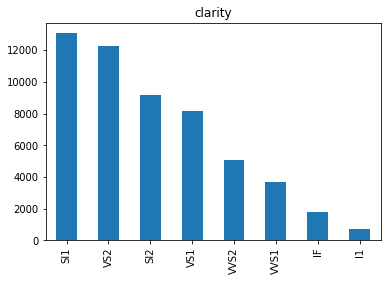

In [24]:
#display bar plot for clarity
df['clarity'].value_counts().plot.bar(title='clarity')

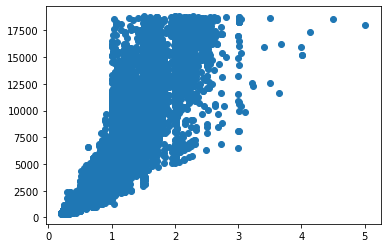

In [25]:
#display relation between price and carat using matplotlib scatterplot
#code documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.scatter(df['carat'], df['price'])

The above scatterplot shows the relationship between price and carat. It can be seen that there is a positive correlation between the two attributes. However, there are a few diamonds, greater than 3 carats that are outliers, since their price is similar to diamonds that are lower in carat. 

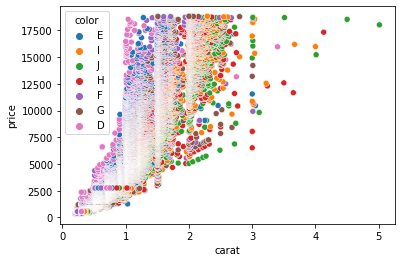

In [26]:
#display the previous graphic using seaborn for custom visuals
sns.scatterplot(data=df, x='carat',y='price', hue='color')


From this above scatterplot using seaborn, we can observe that the outliers mentioned earlier have the worst color ratings, namely I, H, J.
There is only one diamond with the best color rating (D) that has a carat>3 but only costs around 15000.

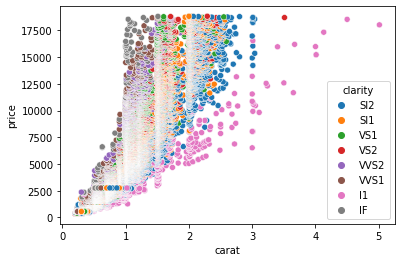

In [27]:
#display seaborn graphic but this time let hue equal clarity to check for consistency of outliers
sns.scatterplot(data=df, x='carat',y='price',hue='clarity')

The last outlier in the previous graphic has the worst rated clarity (I1), which explains it's relatively low price given high rated color and high weight in carat.

In [28]:
#correlation matrix for relationships between numeric attributes
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Apart from depth percentage, all the attributes have a positive correlation with each other.

#Part 3: Inferences

##1. What proportion of diamonds are between .30 and 1.08 carats?





*   First we create a variable to store the count.
*   Then we would increment the variable by one if carat is between the specified range.

* Finally to find proportion we would divide the sum by the length of the total diamonds in the dataset.





In [29]:
sum_carat_in_range = 0
for i in df['carat']:
  if i < 1.08 and i > .30:
    sum_carat_in_range += 1
proportion = sum_carat_in_range/len(df['carat'])
print(proportion)

0.6939933259176864


##2. How many of the diamonds have equal x and y dimensions?



*   To solve this problem, we would first create two lists to store the x and y dimensions of the diamonds.
*   Then we would iterate over the lists using the range function and check over each index if a diamond has equal x and y dimension or not.
* Increment the counter using the if statement and finally we would print the output to the screen.



In [30]:
x_ls = df['x'].tolist()
y_ls = df['y'].tolist()
count_equal_x_y = 0
for i in range(len(x_ls)):
  if x_ls[i] == y_ls[i]:
    count_equal_x_y += 1
print(count_equal_x_y)


17


##3. How many of the diamonds have a carat value that is less than the mean carat value?



* With this problem, firstly we would use the pandas library function to find the mean of the carat attribute.

* Then we create a variable to store the count of diamonds that have a value of carat less than mean.

* As we iterate over the length of the column(carat) we would run an if statement and increment our newly created variable. 

In [31]:
mean_of_carat = df['carat'].mean()
less_than_mean_carat = 0
for i in df['carat']:
  if i < mean_of_carat:
    less_than_mean_carat += 1
print(less_than_mean_carat)

31127


## 4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: **Fair** / **Good** / **Very Good** / **Premium** /**Ideal**


*   Similar to the previous problems, we would first create a variable to store the count of the diamonds that have a cut either premium or ideal.
*   Then we would iterate over the length of the dataset and start an if condition and increment counter.

* Finally we would print the result to screen.





In [32]:
count_quality_cut = 0
for i in df['cut']:
  if i == 'Premium' or i == 'Ideal':
    count_quality_cut += 1
print(count_quality_cut)

35342


##5. Which diamond has the highest price per carat? What is its value?


* Here, we would use the pandas library function div [referenced from stackoverflow.](https://stackoverflow.com/questions/36619631/how-to-divide-two-columns-element-wise-in-a-pandas-dataframe)
This would divide each row value of price by carat.

* Then using the max function we would get the highest price per carat diamond. 

* Use the index function of the list library to find the correct diamond number of the value we determined previously and print it to the screen including the value of the diamond. 

In [33]:
#code: https://stackoverflow.com/questions/36619631/how-to-divide-two-columns-element-wise-in-a-pandas-dataframe
#converted from series to a list since indexing is error prove otherwise
divide = df['price'].div(df['carat']).tolist()
max_per_carat_price = max(divide)
index = divide.index(max_per_carat_price)
print("Diamond #:", index)
print("Value:", df['price'][index])


Diamond #: 27635
Value: 18541


##6. Using both Matplotlib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.

Tried tons of resources but could not figure out how to plot the cut attribute using matplotlib boxplot. This issue seems to be relevent only while doing non numeric matplotlib graphics.
Might have finally figured a way to solve this using code from [here](https://stackoverflow.com/questions/70594634/pandas-boxplot-compare-all-data-from-column-with-filtered-version-of-same-column)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


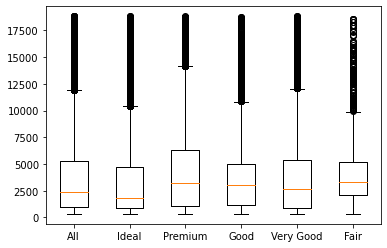

In [34]:
#Took almost three hours to solve this without getting type errors involving datatype of Cut. Did not run into any problem when using a numeric attribute.
box = plt.boxplot([df['price'], df[df['cut'] == 'Ideal']['price'], df[df['cut'] == 'Premium']['price'], df[df['cut'] == 'Good']['price'], df[df['cut'] == 'Very Good']['price'], df[df['cut'] == 'Fair']['price']],labels=['All','Ideal', 'Premium','Good','Very Good', 'Fair'])



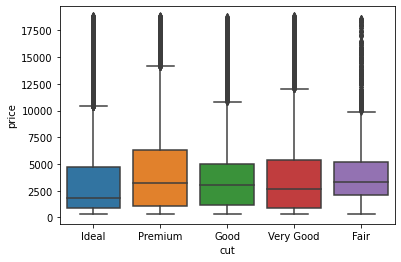

In [35]:
sns.boxplot(data=df, y='price', x='cut')

Median price of all the different cuts appear to be around $3000. The premium cut has the highest median. The longer box for the premium tells us that it's price distribution is the least reliable.

##7. Using both Matplotlib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?


Scatterplot graph of price and carat using the matplotlib library

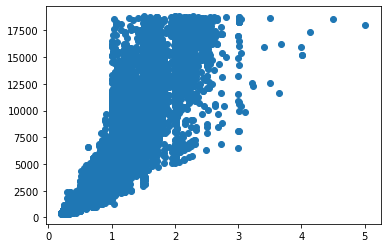

In [36]:
plt.scatter(y=df['price'],x=df['carat'])

Scatterplot graph of price and carat using seaborn library

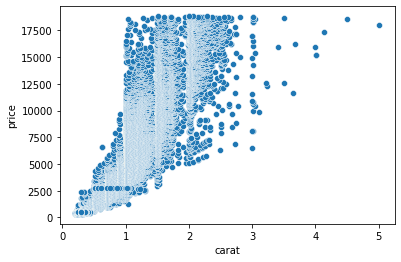

In [37]:
sns.scatterplot(y=df['price'], x=df['carat'])

The findings were already reported at the end of the previous section(EDA). There is a strong correlation between price and carat. There are some outliers that can be observed in this scatterplot but their existence can be justified when we compare other attributes like color and clarity.

#Part 4. Conclusion

**In conclusion, we learned from the various graphical analysis of the different attributes of a diamond that there is high correlation between price and the 4Cs, namely Cut, Color, Clarity and Carat. This is reinforced by the correlation matrix and we can conclude that these four attributes of a diamond play the largest role in calculating the price of one.
Some other key points to note are that it is extremely rare that the dimensions of a diamond are equal and that almost 70% of all diamonds are less than 1.08 carat but more than .30 carat.**